**Détection de visage dans une image**

Vous pouvez détecter les visages dans une image en utilisant le détecteur de visage d’opencv qui est implémenté avec un classifier CascadeClassifier. Fondamentalement, il effectue une opération simple. Étant donné une image, le détecteur de visage examiner chaque emplacement de l'image et il classifie comme "visage" ou "non visage". Opencv contient déjà de nombreux classifieurs pré-entrainés pour le visage, les yeux, le sourire, etc. Ces fichiers XML sont stockés dans le dossier ressources/haarcascades/.
Nous utilisons  v2.CascadeClassifier.detectMultiScale() pour détecter le visage, les yeux, etc. et cette fonction est définie comme :

cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]])

Ses paramètres sont:
image: matrice de type CV_8U contenant une image où des objets sont détectés.
scaleFactor: paramètre spécifiant la réduction de la taille de l'image à chaque échelle d'image. Ce facteur d'échelle est utilisé pour créer une pyramide d'échelle comme indiqué dans l'image. minNeighbors: paramètre spécifiant le nombre de voisins que chaque rectangle candidat doit avoir pour le conserver. Ce paramètre affectera la qualité des visages détectés: une valeur plus élevée entraîne moins de détections mais avec une qualité supérieure. Nous utilisons 5 dans le code. Si des faces sont trouvées, elle renvoie les positions des faces détectées en Rect (x, y, w, h).
Il suffit maintenant de parcourir les zones de visage dans faces et dessiner les cadres autour des visages trouvés. Voici le code :


In [3]:
# monter votre Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Télécharger la base ici:
https://drive.google.com/file/d/137nl0lyjHRwecMP_Ncbf6wpQT5RNg0QW/view?usp=sharing

In [4]:
# récupérer les données en fichier zip et l'extraire ici

from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Centrale Lille/G3/Data-Face.zip"

with ZipFile(file_name, 'r') as Zip:
  Zip.extractall()
  print('Done')

Done


In [5]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Centrale Lille/G3/Data-FaceDetection and Recognition.zip"

with ZipFile(file_name, 'r') as Zip:
  Zip.extractall()
  print('Done')

Done


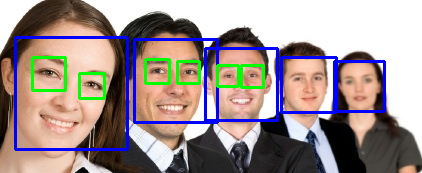

In [6]:
import numpy as np
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier('Data-Face/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Data-Face/haarcascades/haarcascade_eye.xml')

# directement aussi
#face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
#eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))


img = cv2.imread('Data-Face/Group-Faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)


***Exercice 1*** : écrire un programme qui permet, à l’aide du détecteur réaliser dans ce TP, de détecter le visage à partir d’une séquence d’images capturées par une webcam avec des poses différentes. L’objectif ici est de créer une base de visage de maximum de personnes (promotion JUNIA) avec une vingtaine d’image par personne (différentes poses, différentes échelles, différentes expressions, etc.). Les visages détectés doivent être redimensionnés tous à une seule taille (250x250).

**Reconnaissance de visage dans une image**

L’objectif de ce TP est de développer un système, basé sur la méthode de reconnaissance faciale par un des algorithmes Eigenfaces, FisherFace ou LPBFace implémentés dans opencv, capables de reconnaître un visage à partir d’une base de données de visages de référence et d’étudier les propriétés de cette méthode et ses limitations.

La méthode de reconnaissance doit être développée et appliquée, en premier temps, sur une base d’image de visage et ensuite combinée avec le détecteur de visage. La première étape dans un système de reconnaissance faciale est de créer le modèle d’apprentissage à partir d’une base de visages et leurs identités.
Afin de réaliser la phase d’apprentissage, utiliser l’interface développée dans l’exercice précédent afin de réaliser l’acquisition d’une base d’apprentissage de visages.

In [7]:
import os
import cv2
import numpy as np

# Fonction pour charger les images et leurs labels
def load_faces_and_labels(data_dir):
    faces = []
    labels = []
    label_map = {}  # Dictionnaire pour associer le nom des personnes à des labels numériques
    current_label = 0

    # Parcours des dossiers contenant les images
    for subdir in os.listdir(data_dir):
        subdir_path = os.path.join(data_dir, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, filename)
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    # Charger l'image en niveaux de gris
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    # Redimensionner l'image à une taille standard (par exemple, 100x100)
                    img = cv2.resize(img, (100, 100))
                    faces.append(img)
                    if subdir not in label_map:
                        label_map[subdir] = current_label
                        current_label += 1
                    labels.append(label_map[subdir])

    return np.array(faces), np.array(labels), label_map

# Exemple d'utilisation
data_dir = "/content/Data-FaceDetection and Recognition/FaceRecog-BD-2018/Train"
faces, labels, label_map = load_faces_and_labels(data_dir)
print(f"Label map: {label_map}")


Label map: {'4': 0, '3': 1, '2': 2, '5': 3, '6': 4, '1': 5}


In [8]:
# Créer un objet EigenFace Recognizer
eigenface_recognizer = cv2.face.EigenFaceRecognizer_create()

# Entraîner le modèle
eigenface_recognizer.train(faces, labels)

# Sauvegarder le modèle pour une utilisation future
eigenface_recognizer.save("eigenface_model.xml")

In [9]:
# Créer un objet FisherFace Recognizer
fisherface_recognizer = cv2.face.FisherFaceRecognizer_create()

# Entraîner le modèle
fisherface_recognizer.train(faces, labels)

# Sauvegarder le modèle
fisherface_recognizer.save("fisherface_model.xml")

In [10]:
# Créer un objet LBPH Face Recognizer
lbph_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Entraîner le modèle
lbph_recognizer.train(faces, labels)

# Sauvegarder le modèle
lbph_recognizer.save("lbph_model.xml")


In [12]:
# Charger le modèle préalablement enregistré
recognizer = cv2.face.LBPHFaceRecognizer_create()  # Remplacer par le bon modèle (Eigen, Fisher, LBPH)
recognizer.read("lbph_model.xml")

# Charger l'image à tester
# Replace "path_to_test_image.jpg" with the actual path of your test image
img_path = "Data-FaceDetection and Recognition/FaceRecog-BD-2018/Test/test1.jpg"
# Check if the file exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image file not found at: {img_path}")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    raise ValueError(f"Failed to load image at: {img_path}. Check file format and permissions.")

img_resized = cv2.resize(img, (100, 100))  # Redimensionner à la taille utilisée lors de l'entraînement

# Prédire l'étiquette de la personne dans l'image
label, confidence = recognizer.predict(img_resized)

# Afficher le résultat
print(f"Prédiction : {label_map[label]}, Confiance : {confidence}")

KeyError: 3

In [ ]:
# # Charger les images et leurs labels dans deux listes
# faces = []
# labels = []

# # Initialiser de la reconnaissance de visage (tester different recognizers)
# face_recognizer = cv2.face.eigenfacerecognizer_create()
# #face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# #Pour entertainer un modèle d’apprentissage sur cette base, il suffit d’appliquer la méthode :
# face_recognizer.train(faces, np.array(labels))

# #Ensuite, la reconnaissance d’un visage se fait avec la méthode:
# label = face_recognizer.predict(img)

***Exercice 2*** : Combiner la méthode de reconnaissance avec le détecteur de visage dans une image. Afin de réaliser cette combinaison, il faut rogner la zone de visage à partir de l’image contenant un visage. Ensuite, utiliser l’image rognée comme l’image de test à reconnaitre. Afficher en texte ensuite le label prédit dans la zone du visage.

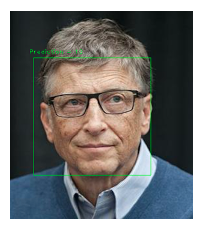

Étendre votre méthode sur la reconnaissance multiple des visages dans l’image :

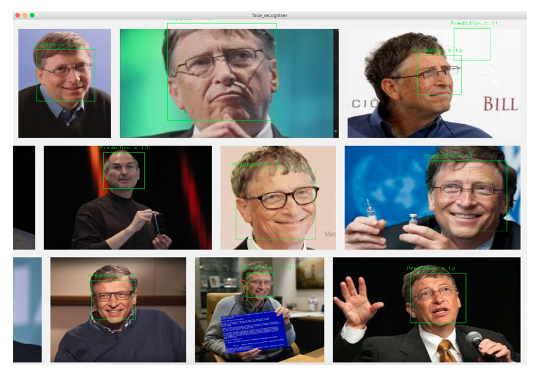

Vous pouvez travaller la partie recon naissance directement sur cette base:
https://drive.google.com/file/d/1OFDDpNpoHH5gE_Pu8EgNLv6ifgio3wJu/view?usp=sharing